# Mineiração de Dadosdo LinkedIn

## Obtenção dos dados

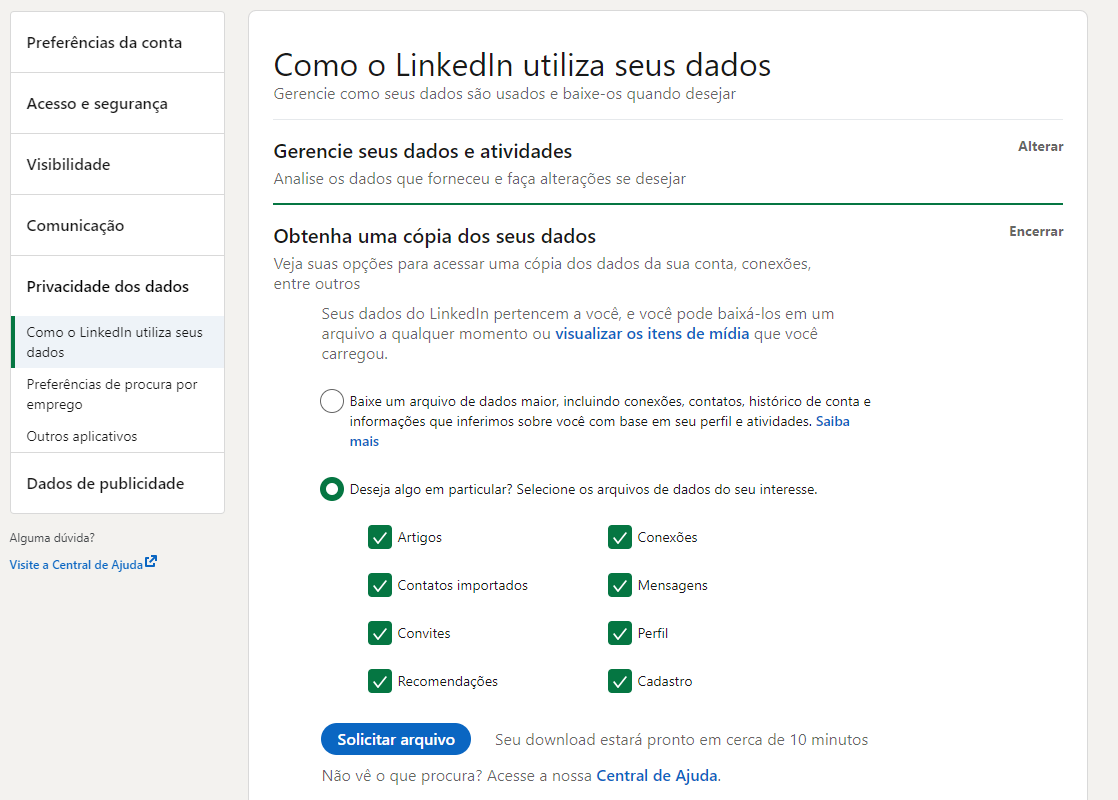

In [94]:
#Os dados são obtidos nas configurações do seu perfil no LinkedIn

from IPython.display import Image
Image(filename='linkedIn.png')

#### As informações de nome foram alteradas para preservar a privacidade dos meus contatos. Portanto os nomes utilizados nessa análise são fakes

In [95]:
#Importação das bibliotecas

#criação de fakers com os names
from faker import Faker 

#Manipulação de datas
import datetime 

#Manipulação de dados
import pandas as pd 

#Manipulação de dados
import numpy as np 

#Criação de Gráficos
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#Localização
from geopy import geocoders
import reverse_geocoder as rg

#Mineração de textos
from nltk.metrics.distance import edit_distance
import nltk
from nltk.metrics.distance import jaccard_distance

#Aprendizado de máquina não supervisionado - Clustering
from sklearn.cluster import KMeans
import simplekml

In [96]:
#Importação dos dados

conexoes = pd.read_csv('conect_fake.csv') #Já utilizando dados fakes

conexoes.head()

First Name Last Name          Email Address  \
0     Robert   Fleming    traciwest@gmail.com   
1    Antonio      Hahn      aaron84@yahoo.com   
2      Corey    Miller    dukeeric@larson.org   
3       Adam     Smith      david05@myers.com   
4     Miguel    Palmer  ycarrillo@hotmail.com   

                              Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On  
0  16 Apr 2021  
1  16 Apr 2021  
2  15 Apr 2021  
3  14 Apr 2021  
4  13 Apr 2021

In [97]:
#Criando variável

fake = Faker()

In [98]:
#Verificando a criação do Primeiro Nome

fake.first_name()

'Eric'

In [99]:
#Verificando a criação do último Nome

fake.last_name()

'Allen'

In [100]:
#Verificando a criação do E-mail

fake.email()

'jeffreynelson@gmail.com'

In [101]:
#Resetando index

conexoes = conexoes.reset_index(drop=True)

In [102]:
#Criando Nomes Fakes

for i in range(0, len(conexoes)):
    conexoes['First Name'][i] = fake.first_name()

conexoes.head()

First Name Last Name          Email Address  \
0      Ashley   Fleming    traciwest@gmail.com   
1   Elizabeth      Hahn      aaron84@yahoo.com   
2       Brian    Miller    dukeeric@larson.org   
3  Kristopher     Smith      david05@myers.com   
4        Lisa    Palmer  ycarrillo@hotmail.com   

                              Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On  
0  16 Apr 2021  
1  16 Apr 2021  
2  15 Apr 2021  
3  14 Apr 2021  
4  13 Apr 2021

In [103]:
#Criando Sobrenomes Fakes

for i in range(0, len(conexoes)):
    conexoes['Last Name'][i] = fake.last_name()

conexoes.head()

First Name Last Name          Email Address  \
0      Ashley     Ortiz    traciwest@gmail.com   
1   Elizabeth    Rivera      aaron84@yahoo.com   
2       Brian    Sexton    dukeeric@larson.org   
3  Kristopher   Bennett      david05@myers.com   
4        Lisa   Summers  ycarrillo@hotmail.com   

                              Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On  
0  16 Apr 2021  
1  16 Apr 2021  
2  15 Apr 2021  
3  14 Apr 2021  
4  13 Apr 2021

In [104]:
#Criando E-mails Fakes

for i in range(0, len(conexoes)):
    conexoes['Email Address'][i] = fake.email()

conexoes.head()

First Name Last Name            Email Address  \
0      Ashley     Ortiz     vangrodney@smith.net   
1   Elizabeth    Rivera   julieedwards@yahoo.com   
2       Brian    Sexton      williamcox@ruiz.com   
3  Kristopher   Bennett  andrewballard@yahoo.com   
4        Lisa   Summers       joseph88@davis.biz   

                              Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On  
0  16 Apr 2021  
1  16 Apr 2021  
2  15 Apr 2021  
3  14 Apr 2021  
4  13 Apr 2021

In [105]:
#Exportando dataset com fake

conexoes.to_csv('conect_fake.csv', index = False)

In [106]:
#Nova coluna com nome e sobrenome

conexoes['Full Name'] = conexoes['First Name'] + ' ' + conexoes['Last Name']
conexoes.head()

First Name Last Name            Email Address  \
0      Ashley     Ortiz     vangrodney@smith.net   
1   Elizabeth    Rivera   julieedwards@yahoo.com   
2       Brian    Sexton      williamcox@ruiz.com   
3  Kristopher   Bennett  andrewballard@yahoo.com   
4        Lisa   Summers       joseph88@davis.biz   

                              Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On           Full Name  
0  16 Apr 2021        Ashley Ortiz  
1  16 Apr 2021    Elizabeth Rivera  
2  15 Apr 2021        Brian Sexton  
3  14 Apr 2021  Kristopher Bennett  
4  13 Apr 2021        Lisa Summers

In [107]:
#Removendo colunas desnecessárias

conexoes.drop(columns=['First Name','Last Name','Email Address'], axis=1, inplace=True)
conexoes.head()

Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On           Full Name  
0  16 Apr 2021        Ashley Ortiz  
1  16 Apr 2021    Elizabeth Rivera  
2  15 Apr 2021        Brian Sexton  
3  14 Apr 2021  Kristopher Bennett  
4  13 Apr 2021        Lisa Summers

In [108]:
#Resetando index

conexoes.reset_index(drop=True, inplace=True)
conexoes.head()

Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On           Full Name  
0  16 Apr 2021        Ashley Ortiz  
1  16 Apr 2021    Elizabeth Rivera  
2  15 Apr 2021        Brian Sexton  
3  14 Apr 2021  Kristopher Bennett  
4  13 Apr 2021        Lisa Summers

In [109]:
#Convertendo datas

conexoes['Connected On'] = pd.to_datetime(conexoes['Connected On'])
conexoes.head()

Company                             Position  \
0                                VOLL        Corporate Mobility Specialist   
1      Delog - Transporte E Logistica                 Gerente de logística   
2  Tecnifox Indústria e Comércio Ltda                 Orçamentista Técnico   
3                            Unisinos  Orientadora de Carreira - Psicóloga   
4              Recrutamento e Seleção                     Recursos Humanos   

  Connected On           Full Name  
0   2021-04-16        Ashley Ortiz  
1   2021-04-16    Elizabeth Rivera  
2   2021-04-15        Brian Sexton  
3   2021-04-14  Kristopher Bennett  
4   2021-04-13        Lisa Summers

In [110]:
#Gráfico Nome x Ano

grafico = px.scatter(conexoes, x = 'Full Name', y = 'Connected On', labels={
                     "Full Name": "Nome",
                     "Connected On": "Período",
                 }, 
                    title='Novas conexão por período')

grafico.show()

In [111]:
#Gráfico Nome x Ano

grupo = conexoes.groupby(by = 'Connected On').count()

In [112]:
#Gráfico Quantidade de conexões por data

grafico = px.line(grupo, 
                  title = 'Novas Conexões por data',
                 labels={ "value": "Valor",
                     "Connected On": "Período",
                        'variable': 'Categoria'})
grafico.show()

In [113]:
#Criando coluna somente com o ano

conexoes['ano'] = (conexoes['Connected On'].dt.year)
conexoes['ano'].head()

0    2021.0
1    2021.0
2    2021.0
3    2021.0
4    2021.0
Name: ano, dtype: float64

In [114]:
#Verificando valores na

conexoes.isna().sum()

Company         42
Position        42
Connected On    22
Full Name        0
ano             22
dtype: int64

In [115]:
#Removendo valores duplicados

conexoes.drop_duplicates()

Company  \
0                                        VOLL   
1              Delog - Transporte E Logistica   
2          Tecnifox Indústria e Comércio Ltda   
3                                    Unisinos   
4                      Recrutamento e Seleção   
..                                        ...   
562  CAAR Do Brasil Consultoria Técnica Ltda.   
563                           Servo Automação   
564                  Contabilidade Atualizada   
565                        SoftwareONE Brasil   
566                    Humana Desenvolvimento   

                                Position Connected On           Full Name  \
0          Corporate Mobility Specialist   2021-04-16        Ashley Ortiz   
1                   Gerente de logística   2021-04-16    Elizabeth Rivera   
2                   Orçamentista Técnico   2021-04-15        Brian Sexton   
3    Orientadora de Carreira - Psicóloga   2021-04-14  Kristopher Bennett   
4                       Recursos Humanos   2021-04-13        Lisa Summers   
..                                   ...          ...                 ...   
562                        Project Chief   2015-05-25       Carolyn Terry   
563          Consultor Técnico de Vendas   2015-05-25           John Cook   
564                           Contadora    2015-05-25       Amanda Jensen   
565                        Sales Manager   2015-05-25        Stephen Page   
566          Gerente de recursos humanos   2015-05-25       Cynthia Clark   

        ano  
0    2021.0  
1    2021.0  
2    2021.0  
3    2021.0  
4    2021.0  
..      ...  
562  2015.0  
563  2015.0  
564  2015.0  
565  2015.0  
566  2015.0  

[567 rows x 5 columns]

In [116]:
#Removendo valores nulos

conexoes.dropna(inplace=True)
conexoes.isna().sum()

Company         0
Position        0
Connected On    0
Full Name       0
ano             0
dtype: int64

In [117]:
#Convertendo ano em inteiro

conexoes['ano'] = conexoes['ano'].astype(int)

In [118]:
#Criando coluna com mês 

conexoes['mes'] = (conexoes['Connected On'].dt.month_name())
conexoes['mes'].head()

0    April
1    April
2    April
3    April
4    April
Name: mes, dtype: object

In [119]:
conexoes['mes_n'] = (conexoes['Connected On'].dt.month)
conexoes['mes_n'].head()

0    4
1    4
2    4
3    4
4    4
Name: mes_n, dtype: int64

In [120]:
#Agrupando por mês

grupo_mes = conexoes.groupby(by = 'mes').count()
grupo_mes

Company  Position  Connected On  Full Name  ano  mes_n
mes                                                              
April           37        37            37         37   37     37
August          30        30            30         30   30     30
December        32        32            32         32   32     32
February        65        65            65         65   65     65
January        118       118           118        118  118    118
July            32        32            32         32   32     32
June            48        48            48         48   48     48
March           29        29            29         29   29     29
May             44        44            44         44   44     44
November        44        44            44         44   44     44
October         26        26            26         26   26     26
September       20        20            20         20   20     20

In [121]:
#Grafico Quantidade de conexões por mês

grafico = px.line(grupo_mes,
                  title = 'Novas conexões por mês', 
                 labels={ "value": "Valor",
                     "mes": "Mês",
                        'variable': 'Categoria'})

grafico.show()

In [122]:
#Ordedando os meses

conexoes.sort_values(by=['mes_n'], inplace=True)

conexoes

Company  \
367                                 Sonastério   
368                                 BN Express   
369                       Toro - Investimentos   
370                                      FIEMG   
371                  Instituto Defesa Coletiva   
..                                         ...   
461                   Almeida Vales Engenharia   
459                                 Dg Socialm   
458                                   USIMINAS   
456  Contra Regras Produção e Comunicação Ltda   
533                                 Stellantis   

                                        Position Connected On  \
367                      Coordenador de projetos   2019-01-20   
368                                          CEO   2019-01-19   
369                    Senior Talent Acquisition   2019-01-18   
370         Coordenadora de Educação Corporativa   2019-01-18   
371                      Analista Administrativo   2019-01-17   
..                                           ...          ...   
461                           Sócio proprietário   2018-12-05   
459                            Marketing Digital   2018-12-05   
458  Intern of Sustainability at Usiminas Mining   2018-12-05   
456                                Adminstrativo   2018-12-07   
533                             NVH CAE Engineer   2015-12-04   

            Full Name   ano       mes  mes_n  
367    Stephanie Ball  2019   January      1  
368       Shirley Cox  2019   January      1  
369   Catherine White  2019   January      1  
370     Charles Grant  2019   January      1  
371     Michael Ellis  2019   January      1  
..                ...   ...       ...    ...  
461     Zachary Black  2018  December     12  
459    Nancy Gonzalez  2018  December     12  
458  Brenda Maldonado  2018  December     12  
456    Justin Estrada  2018  December     12  
533    Melanie Tucker  2015  December     12  

[525 rows x 7 columns]

In [123]:
#Tradução dos meses
conexoes['mes'] = conexoes['mes'].replace({'January': 'Janeiro',
                                          'February': 'Fevereiro',
                                          'March': 'Março',
                                          'April': 'Abril',
                                           'May': 'Maio',
                                           'June': 'Junho',
                                           'July': 'Julho',
                                           'August': 'Agosto',
                                           'September': 'Setembro',
                                           'October': 'Outubro',
                                           'November': 'Novembro',
                                           'December': 'Dezembro',})

In [124]:
#Contagem por mês 
grafico = px.histogram(conexoes['mes'], 
                       title = 'Novas conexões por mês',
                       labels={ "value": "Mês",
                         'variable': 'Categoria',})

grafico.show()

In [125]:
#Contagem por ano
grupo_ano = conexoes['ano'].value_counts()
grupo_ano

2019    278
2020    107
2018     79
2015     34
2021     26
2016      1
Name: ano, dtype: int64

In [126]:
#Resetando os índices
grupo_ano = grupo_ano.reset_index()

In [127]:
#Renomeando as colunas
grupo_ano.rename(columns={'index': 'ano',
                          'ano': 'Quantidade'}, inplace=True)


In [128]:
#Ordenando por ano
grupo_ano.sort_values('ano', inplace=True)

In [129]:
#Grafico contagem por ano
grafico = px.bar(x = grupo_ano['ano'], y = grupo_ano['Quantidade'],  
                 title = 'Novas Conexões por ano',
                       labels={ "y": "Quantidade",
                         'x': 'Ano',})

grafico.show()

In [130]:
#Valores unicos
np.unique(conexoes['Company'], return_counts=True)

(array([' A precisão segurança patrimonial', '3 Corações S/A',
        '3DFindable', 'ABB Eletrificação', 'AETHRA  - Automotive Systems',
        'AETHRA GROUP - Automotive Systems', 'AEVO', 'AGIS MEDICAL',
        'AMGS', 'APTA ', 'ASSEMBLEIA DE DEUS', 'ATS Informática',
        'Abreu Nobre Advocacia e Consultoria Jurídica',
        'Abu Dhabi Executive Office', 'Accenture', 'Accenture Brasil',
        'Acelera Profissional', 'Action Consultoria & Negócios',
        'AeM Negócios Públicos', 'Afya Educacional',
        'Ag Acabamentos e comercio em peças',
        'Agile Project Educação e Treinamentos', 'Air Liquide Brasil',
        'Alicorp', 'Alldagro - Gestão e Resultados Agropecuários',
        'Allen | Soluções em Tecnologia', 'Allugator',
        'AlmavivA do Brasil', 'Almeida Vales Engenharia', 'Aloo Telecom',
        'Alpha Diamond Team', 'Altran Consultoria em Tecnologia Brasil',
        'Amanco Wavin', 'Ambev', 'Andrade Silva Advogados',
        'Anglo American', 'AngloGold

In [131]:
#Tamanho dataset
conexoes.shape

(525, 7)

In [132]:
#Quantidade de valores unicos
len(np.unique(conexoes['Company']))

452

In [133]:
#Treemapping por empresa

grafico = px.treemap(conexoes, path=['Company', 'Position', 'Full Name'])
grafico.show()

In [134]:
#Conferindo valores unicos
np.unique(conexoes['Company'], return_counts=True)

(array([' A precisão segurança patrimonial', '3 Corações S/A',
        '3DFindable', 'ABB Eletrificação', 'AETHRA  - Automotive Systems',
        'AETHRA GROUP - Automotive Systems', 'AEVO', 'AGIS MEDICAL',
        'AMGS', 'APTA ', 'ASSEMBLEIA DE DEUS', 'ATS Informática',
        'Abreu Nobre Advocacia e Consultoria Jurídica',
        'Abu Dhabi Executive Office', 'Accenture', 'Accenture Brasil',
        'Acelera Profissional', 'Action Consultoria & Negócios',
        'AeM Negócios Públicos', 'Afya Educacional',
        'Ag Acabamentos e comercio em peças',
        'Agile Project Educação e Treinamentos', 'Air Liquide Brasil',
        'Alicorp', 'Alldagro - Gestão e Resultados Agropecuários',
        'Allen | Soluções em Tecnologia', 'Allugator',
        'AlmavivA do Brasil', 'Almeida Vales Engenharia', 'Aloo Telecom',
        'Alpha Diamond Team', 'Altran Consultoria em Tecnologia Brasil',
        'Amanco Wavin', 'Ambev', 'Andrade Silva Advogados',
        'Anglo American', 'AngloGold

In [135]:
#Conferindo valores unicos

np.unique(conexoes['Position'], return_counts=True)

(array([' Senior Smarketing Analyst', 'ADAS/AD Project Chief',
        'AUXILIAR ADMINISTRATIVO E FINANCEIRO',
        'Acelerador Empreendedores Solo', 'Adm/Compras',
        'Administração de Contratos', 'Adminstrativo', 'Advogada',
        'Advogada Tributarista', 'Advogada associada', 'Advogado',
        'Advogado associado', 'Advogado corporativo', 'Agente comercial',
        'Aircraft Maintenance Inspector', 'Almoxarife',
        'Aluno pesquisador de doutorado', 'Analista Administrativo',
        'Analista Comercial', 'Analista Contábil',
        'Analista Faturamento JR', 'Analista Financeiro',
        'Analista III Engenharia Elétrica / Eletrônica',
        'Analista Operacional', 'Analista RH',
        'Analista Sênior de Planejamento de Frota',
        'Analista Técnico Sênior - Engenharia Elétrica',
        'Analista administrativo', 'Analista comercial',
        'Analista da Qualidade',
        'Analista da Qualidade Jr - CST Chassi LATAM',
        'Analista da qualidade S

In [136]:
#Conferindo valores unicos
conexoes['Company'].shape

(525,)

In [137]:
#Quantidade de cargos
len(np.unique(conexoes['Position']))

470

In [138]:
#Histograma de cargos
grafico = px.histogram(conexoes['Position'],  
                 title = 'Quantidade de Cargos',
                       labels={ "value": "Cargo",
                         'variable': 'Categoria',})
grafico.show()

In [139]:
#Treemapping por cargo

grafico = px.treemap(conexoes, path = ['Position', 'Company', 'Full Name'])

grafico.show()

# Agrupamento dos Cargos

In [140]:
#Entendendo os bigramas
bigramas_c1 = nltk.bigrams('analista de business intellicenge')

In [141]:
'analista de business inteligeence'.split()

['analista', 'de', 'business', 'inteligeence']

In [142]:
bigramas_c1 = list(nltk.bigrams('analista de business intelligence'.split(), pad_right=True, pad_left=True ))

In [143]:
list(bigramas_c1)

[(None, 'analista'),
 ('analista', 'de'),
 ('de', 'business'),
 ('business', 'intelligence'),
 ('intelligence', None)]

In [144]:
bigramas_c2 = list(nltk.bigrams('cientista de dados'.split(), pad_right=True, pad_left=True ))

bigramas_c2

[(None, 'cientista'), ('cientista', 'de'), ('de', 'dados'), ('dados', None)]

In [145]:
bigramas_c3 = list(nltk.bigrams('analista de dados'.split(), pad_right=True, pad_left=True ))

bigramas_c3

[(None, 'analista'), ('analista', 'de'), ('de', 'dados'), ('dados', None)]

### Jaccard

In [146]:
c1 = 'analista de business intelligence'.split()
c2 = 'cientista de dados'.split()
c3 = 'analista de dados'.split()

In [147]:
c1, c2, c3

(['analista', 'de', 'business', 'intelligence'],
 ['cientista', 'de', 'dados'],
 ['analista', 'de', 'dados'])

In [148]:
#c1 x c3

intersecao = set(c1).intersection(set(c3))
intersecao

{'analista', 'de'}

In [149]:
uniao = set(c1).union(set(c3))
uniao

{'analista', 'business', 'dados', 'de', 'intelligence'}

In [150]:
(len(uniao) - len(intersecao)) / len(uniao)

0.6

In [151]:
#c1 x c1

jaccard_distance(set(c1), set(c1))

0.0

In [152]:
#c1 x c3

jaccard_distance(set(c1), set(c3))

0.6

In [153]:
#Criando um dataframe de teste
cargos_df = pd.DataFrame(columns=['Position'], data=['Estagiário',
                                                     'Estagiário de Engenharia',
                                                     'Assitente Administrativo',
                                                     'Auxiliar Administrativo'])

cargos_df

Position
0                Estagiário
1  Estagiário de Engenharia
2  Assitente Administrativo
3   Auxiliar Administrativo

In [154]:
#Retornando um array

todos_cargos = cargos_df['Position'].values

todos_cargos

array(['Estagiário', 'Estagiário de Engenharia',
       'Assitente Administrativo', 'Auxiliar Administrativo'],
      dtype=object)

In [155]:
set(todos_cargos)

{'Assitente Administrativo',
 'Auxiliar Administrativo',
 'Estagiário',
 'Estagiário de Engenharia'}

In [156]:
#Aplicando a função de distancia de jaccard no dataframe de teste
for cargo1 in todos_cargos:
    print(cargo1)
    print('------------')
    for cargo2 in todos_cargos:
        print(cargo2, jaccard_distance(set(cargo1), set(cargo2)))
    print('\n')
    
#Quanto menor a distância, mais próxima são as palavras

Estagiário
------------
Estagiário 0.0
Estagiário de Engenharia 0.35714285714285715
Assitente Administrativo 0.625
Auxiliar Administrativo 0.6666666666666666


Estagiário de Engenharia
------------
Estagiário 0.35714285714285715
Estagiário de Engenharia 0.0
Assitente Administrativo 0.4117647058823529
Auxiliar Administrativo 0.55


Assitente Administrativo
------------
Estagiário 0.625
Estagiário de Engenharia 0.4117647058823529
Assitente Administrativo 0.0
Auxiliar Administrativo 0.25


Auxiliar Administrativo
------------
Estagiário 0.6666666666666666
Estagiário de Engenharia 0.55
Assitente Administrativo 0.25
Auxiliar Administrativo 0.0




In [157]:
#Criando os clusters com os cargos
limite = 0.3
clusters = {}
for cargo1 in todos_cargos:
    clusters[cargo1]=[]
    for cargo2 in todos_cargos:
        if cargo2 in clusters[cargo1] or cargo2 in clusters and cargo1 in clusters[cargo2]:
            continue
            
        distancia = jaccard_distance(set(cargo1), set(cargo2))
        
        if distancia <= limite:
            clusters[cargo1].append(cargo2)

In [158]:
#Verificando os clusters
clusters

{'Estagiário': ['Estagiário'],
 'Estagiário de Engenharia': ['Estagiário de Engenharia'],
 'Assitente Administrativo': ['Assitente Administrativo',
  'Auxiliar Administrativo'],
 'Auxiliar Administrativo': ['Auxiliar Administrativo']}

In [159]:
#Retornando os clusters com mais de um cargo

cluster = [clusters[cargo] for cargo in clusters if len(clusters[cargo]) > 1]

In [160]:
#Verificando os clusters

cluster

[['Assitente Administrativo', 'Auxiliar Administrativo']]

In [161]:
#Aplicando no dataset completo
todos_cargos = conexoes['Position'].values
len(todos_cargos)

525

In [162]:
#Criando os sets
todos_cargos = set(todos_cargos)

In [163]:
#Tamanho do set
len(todos_cargos)

470

In [164]:
#Criando os clusters com os cargos

limite = 0.1
clusters = {}
for cargo1 in todos_cargos:
    clusters[cargo1]=[]
    for cargo2 in todos_cargos:
        if cargo2 in clusters[cargo1] or cargo2 in clusters and cargo1 in clusters[cargo2]:
            continue
            
        distancia = jaccard_distance(set(cargo1), set(cargo2))
        
        if distancia <= limite:
            clusters[cargo1].append(cargo2)

In [165]:
#Retornando os clusters com mais de um cargo

clusters = [clusters[cargo] for cargo in clusters if len(clusters[cargo]) > 1]

In [166]:
clusters, len(clusters)

([['Assistente administrativo',
   'Diretor Administrativo',
   'Gerente Administrativo'],
  ['Analista de Compras', 'Assistente de Compras', 'Analista de Compras I'],
  ['Assistente de Compras II',
   'Assistente de Compras',
   'Analista de Compras I'],
  ['Analista operacional jr', 'Assistente operacional'],
  ['Advogada', 'Advogado'],
  ['Estagiário de engenharia', 'Estagiário de Engenharia '],
  ['Gerente de serviços', 'Gerente de Serviços'],
  ['Auxiliar de engenharia', 'Auxiliar de Engenharia'],
  ['Gerente Comercial', 'Gerente comercial'],
  ['Coordenador de manutenção', 'Controlador de manutenção'],
  ['Analista de Recursos Humanos Sr', 'Analista de Recursos Humanos '],
  ['Analista de sistemas pleno',
   'Analista de planejamento',
   'Analista de planejamento '],
  ['Analista de planejamento', 'Analista de planejamento '],
  ['Analista de recrutamento e seleção', 'Analista de manutenção e processos'],
  ['Consultor técnico comercial', 'Consultor comercial'],
  ['Analista de 

In [167]:
#Resetando index
conexoes.reset_index(drop=True, inplace=True)

In [168]:
#Criando um dicionario com os nomes
cluster_contato = {}
for cluster in clusters:
    #print(cluster)
    cluster_contato[tuple(cluster)] = []
    for contato in range(0, len(conexoes)):
        if conexoes['Position'][contato] in cluster:
            cluster_contato[tuple(cluster)].append(conexoes['Full Name'][contato])

cluster_contato

{('Assistente administrativo',
  'Diretor Administrativo',
  'Gerente Administrativo'): ['Jean Harper',
  'Adam Peterson',
  'Shawn Webb',
  'Sharon Miller',
  'Christina Gray'],
 ('Analista de Compras',
  'Assistente de Compras',
  'Analista de Compras I'): ['Jennifer Soto', 'Eric Hinton', 'Katherine Wolf'],
 ('Assistente de Compras II',
  'Assistente de Compras',
  'Analista de Compras I'): ['Eric Hinton', 'Katherine Wolf', 'David Myers'],
 ('Analista operacional jr', 'Assistente operacional'): ['Ryan Hall',
  'Laurie Ford'],
 ('Advogada', 'Advogado'): ['Morgan Lopez',
  'Jennifer Mcdowell',
  'Kenneth Graham'],
 ('Estagiário de engenharia', 'Estagiário de Engenharia '): ['Anthony Davis',
  'Michael White',
  'Lindsey Taylor',
  'Donald Thompson'],
 ('Gerente de serviços', 'Gerente de Serviços'): ['Ryan Flores',
  'Roger Morse'],
 ('Auxiliar de engenharia', 'Auxiliar de Engenharia'): ['Debbie Davis',
  'Brent Stevens',
  'Laura Melton'],
 ('Gerente Comercial', 'Gerente comercial'): [

In [169]:
#Criando uma visualização em html

from IPython.core.display import HTML

for cargos in cluster_contato:
    lista_cargos = 'Lista de cargos no grupos: ' + ', '.join(cargos)
    #print(lista_cargos)
    
    termos = set(cargos[0].split())
                 
    for palavras in cargos:
        termos.intersection_update(set(palavras.split()))
    if len(termos)== 0:
        termos = ['*** Nenhum termo em comum ***']
    termos_impressao = 'Termos Comuns:' + ', '.join(termos)
    
    display(HTML(f'<h5>{lista_cargos}</h3>'))
    display(HTML(f'<p>{termos_impressao}</p>'))
    display(HTML(f'<p>{"-"*70}</p>'))
    display(HTML(f'<p><mark>{", ".join(cluster_contato[cargos])}</mark></p>'))

In [170]:
#Trabalhado com json e html
import json
import codecs

from IPython.core.display import display


In [171]:
#Salvando em um arquivo json
saida_json = {'name': 'LinkedIn', 'children': []}

for grupos in cluster_contato:
    #print(grupos)
    saida_json['children'].append({'name': ',' .join(grupos)[:20],
                                  'children': [{'name': contato} for contato in cluster_contato[grupos]]})
    
    f = open('dadoslink.json', 'w', encoding='utf8')
    f.write(json.dumps(saida_json, indent=1, ensure_ascii=False))
    f.close

In [172]:
#Abrindo o json
data = json.load(open('dadoslink.json', encoding='utf8'))

data

{'name': 'LinkedIn',
 'children': [{'name': 'Assistente administr',
   'children': [{'name': 'Jean Harper'},
    {'name': 'Adam Peterson'},
    {'name': 'Shawn Webb'},
    {'name': 'Sharon Miller'},
    {'name': 'Christina Gray'}]},
  {'name': 'Analista de Compras,',
   'children': [{'name': 'Jennifer Soto'},
    {'name': 'Eric Hinton'},
    {'name': 'Katherine Wolf'}]},
  {'name': 'Assistente de Compra',
   'children': [{'name': 'Eric Hinton'},
    {'name': 'Katherine Wolf'},
    {'name': 'David Myers'}]},
  {'name': 'Analista operacional',
   'children': [{'name': 'Ryan Hall'}, {'name': 'Laurie Ford'}]},
  {'name': 'Advogada,Advogado',
   'children': [{'name': 'Morgan Lopez'},
    {'name': 'Jennifer Mcdowell'},
    {'name': 'Kenneth Graham'}]},
  {'name': 'Estagiário de engenh',
   'children': [{'name': 'Anthony Davis'},
    {'name': 'Michael White'},
    {'name': 'Lindsey Taylor'},
    {'name': 'Donald Thompson'}]},
  {'name': 'Gerente de serviços,',
   'children': [{'name': 'Ryan F

In [173]:
#Retornando os valres
valores = json.dumps(data, ensure_ascii=False)
valores

'{"name": "LinkedIn", "children": [{"name": "Assistente administr", "children": [{"name": "Jean Harper"}, {"name": "Adam Peterson"}, {"name": "Shawn Webb"}, {"name": "Sharon Miller"}, {"name": "Christina Gray"}]}, {"name": "Analista de Compras,", "children": [{"name": "Jennifer Soto"}, {"name": "Eric Hinton"}, {"name": "Katherine Wolf"}]}, {"name": "Assistente de Compra", "children": [{"name": "Eric Hinton"}, {"name": "Katherine Wolf"}, {"name": "David Myers"}]}, {"name": "Analista operacional", "children": [{"name": "Ryan Hall"}, {"name": "Laurie Ford"}]}, {"name": "Advogada,Advogado", "children": [{"name": "Morgan Lopez"}, {"name": "Jennifer Mcdowell"}, {"name": "Kenneth Graham"}]}, {"name": "Estagiário de engenh", "children": [{"name": "Anthony Davis"}, {"name": "Michael White"}, {"name": "Lindsey Taylor"}, {"name": "Donald Thompson"}]}, {"name": "Gerente de serviços,", "children": [{"name": "Ryan Flores"}, {"name": "Roger Morse"}]}, {"name": "Auxiliar de engenhar", "children": [{"n

In [174]:
#Criando um novo json
saida_json = {'name': 'Linkedin', 'children': []}
contador = 1
for grupos in cluster_contato:
  #print(grupos)
  if contador > 10:
    break
  
  saida_json['children'].append({'name': ', '.join(grupos)[:20],
                                 'children': [{'name': contato} for contato in cluster_contato[grupos]]})
  f = open('dados2.json', 'w')
  f.write(json.dumps(saida_json, indent=1))
  f.close()

  contador += 1

In [175]:
data

{'name': 'LinkedIn',
 'children': [{'name': 'Assistente administr',
   'children': [{'name': 'Jean Harper'},
    {'name': 'Adam Peterson'},
    {'name': 'Shawn Webb'},
    {'name': 'Sharon Miller'},
    {'name': 'Christina Gray'}]},
  {'name': 'Analista de Compras,',
   'children': [{'name': 'Jennifer Soto'},
    {'name': 'Eric Hinton'},
    {'name': 'Katherine Wolf'}]},
  {'name': 'Assistente de Compra',
   'children': [{'name': 'Eric Hinton'},
    {'name': 'Katherine Wolf'},
    {'name': 'David Myers'}]},
  {'name': 'Analista operacional',
   'children': [{'name': 'Ryan Hall'}, {'name': 'Laurie Ford'}]},
  {'name': 'Advogada,Advogado',
   'children': [{'name': 'Morgan Lopez'},
    {'name': 'Jennifer Mcdowell'},
    {'name': 'Kenneth Graham'}]},
  {'name': 'Estagiário de engenh',
   'children': [{'name': 'Anthony Davis'},
    {'name': 'Michael White'},
    {'name': 'Lindsey Taylor'},
    {'name': 'Donald Thompson'}]},
  {'name': 'Gerente de serviços,',
   'children': [{'name': 'Ryan F

In [176]:
#lendo o novo json
data = json.load(open('dados2.json', encoding='utf8'))

In [177]:
# Criando um grafico de Collapsible Tree em HTML
   
visualizacao = """<!DOCTYPE html>
<meta charset='utf-8'>
<style>

.node circle {
  fill: #fff;
  stroke: steelblue;
  stroke-width: 1.5px;
}

.node {
  font: 10px sans-serif;
}

.link {
  fill: none;
  stroke: #ccc;
  stroke-width: 1.5px;
}

</style>
<body>
<script src='https://d3js.org/d3.v3.min.js'></script>
<script>

root = %s;
//j = JSON.parse(valores);

var width = 1080,
    height = 2200;

var cluster = d3.layout.cluster()
    .size([height, width - 160]);

var diagonal = d3.svg.diagonal()
    .projection(function(d) { return [d.y, d.x]; });

var svg = d3.select('body').append('svg')
    .attr('width', width)
    .attr('height', height)
  .append('g')
    .attr('transform', 'translate(50,0)');

console.log(root);


var nodes = cluster.nodes(root),
    links = cluster.links(nodes);

var link = svg.selectAll('.link')
    .data(links)
  .enter().append('path')
    .attr('class', 'link')
    .attr('d', diagonal);

var node = svg.selectAll('.node')
    .data(nodes)
  .enter().append('g')
    .attr('class', 'node')
    .attr('transform', function(d) { return 'translate(' + d.y + ',' + d.x + ')'; })

node.append('circle')
    .attr('r', 4.5);

node.append('text')
    .attr('dx', function(d) { return d.children ? -8 : 8; })
    .attr('dy', 3)
    .style('text-anchor', function(d) { return d.children ? 'end' : 'start'; })
    .text(function(d) { return d.name; });


d3.select(self.frameElement).style('height', height + 'px');


</script>

"""


In [178]:
#Fechando o html
with open('html_file.html', 'w', encoding='utf8' ) as f:
    f.write(visualizacao % (valores))
    f.close()


In [179]:
# Criando um grafico de Collapsible Tree Circular em HTML

visualizacao2 = """<!DOCTYPE html>
<meta charset="utf-8">
<style>

.node circle { fill: #fff; stroke: steelblue; stroke-width: 1.5px; }
.node { font: 11px sans-serif; }
.link { fill: none; stroke: #ccc; stroke-width: 1.5px; }

</style>
<body>
<script src="https://d3js.org/d3.v3.min.js"></script>
<script>

var diameter = 960;

var tree = d3.layout.tree()
    .size([360, diameter / 2 - 120])
    .separation(function(a, b) { return (a.parent == b.parent ? 1 : 2) / a.depth; });

var diagonal = d3.svg.diagonal.radial()
    .projection(function(d) { return [d.y, d.x / 180 * Math.PI]; });

var svg = d3.select("body").append("svg")
    .attr("width", diameter)
    .attr("height", diameter)
  .append("g")
    .attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

root = %s;

var nodes = tree.nodes(root),
    links = tree.links(nodes);

var link = svg.selectAll(".link")
    .data(links)
  .enter().append("path")
    .attr("class", "link")
    .attr("d", diagonal);

var node = svg.selectAll(".node")
    .data(nodes)
  .enter().append("g")
    .attr("class", "node")
    .attr("transform", function(d) { return "rotate(" + (d.x - 90) + ")translate(" + d.y + ")"; })

node.append("circle")
    .attr("r", 4.5);

node.append("text")
    .attr("dy", ".31em")
    .attr("text-anchor", function(d) { return d.x < 180 ? "start" : "end"; })
    .attr("transform", function(d) { return d.x < 180 ? "translate(8)" : "rotate(180)translate(-8)"; })
    .text(function(d) { return d.name; });


d3.select(self.frameElement).style("height", diameter - 10 + "px");

</script>
"""

In [180]:
#Salvando a visualização em HTML
with open('html_file2.html', 'w', encoding='utf8' ) as f:
    f.write(visualizacao2 % (valores))
    f.close()


### Trabalhando com localização

In [181]:
#API google geocoders
g = geocoders.GoogleV3(' ') #Adicionar Chave da Credencial da API

In [182]:
#Relembrando dataset
conexoes.head(10)

Company  \
0                         Sonastério   
1                         BN Express   
2               Toro - Investimentos   
3                              FIEMG   
4          Instituto Defesa Coletiva   
5                 www.RogerLessa.com   
6  União Equipamentos Mecânicos Ltda   
7                Tecnocar Engenharia   
8                  PUC Minas Oficial   
9                           Autônomo   

                                            Position Connected On  \
0                            Coordenador de projetos   2019-01-20   
1                                                CEO   2019-01-19   
2                          Senior Talent Acquisition   2019-01-18   
3               Coordenadora de Educação Corporativa   2019-01-18   
4                            Analista Administrativo   2019-01-17   
5                                                CEO   2019-01-17   
6  Analista de Métodos e Processos Pleno | Analis...   2019-01-17   
7                             Projetos de Engenharia   2019-01-17   
8                          Assistente administrativo   2019-01-16   
9                                 Instalador técnico   2019-01-16   

         Full Name   ano      mes  mes_n  
0   Stephanie Ball  2019  Janeiro      1  
1      Shirley Cox  2019  Janeiro      1  
2  Catherine White  2019  Janeiro      1  
3    Charles Grant  2019  Janeiro      1  
4    Michael Ellis  2019  Janeiro      1  
5    Robert Gibson  2019  Janeiro      1  
6    Andrew Thomas  2019  Janeiro      1  
7    Tracey Rhodes  2019  Janeiro      1  
8      Jean Harper  2019  Janeiro      1  
9     David Ibarra  2019  Janeiro      1

In [183]:
#Verificando a localização de uma empresa exemplo
localizacao = g.geocode('Tecnifox Indústria e Comércio Ltda')
localizacao

Location(Rua Paulo D'Assunção, 77 - Jardim Industrial, Contagem - MG, 32215-270, Brazil, (-19.9652296, -44.0159956, 0.0))

In [184]:
#Selecionando latitude e longitude

localizacao.latitude, localizacao.longitude

(-19.9652296, -44.0159956)

In [185]:
#criando duas colunas novas no dataset
conexoes['Latitude'] = None
conexoes['Longitude'] = None

In [186]:
#Buscando latitude e longitude de todas as empresas do dataset
for i in range(0, len(conexoes)):
    print(conexoes['Company'][i])
    try:
        localizacao = g.geocode(conexoes['Company'][i])
    except:
        print(conexores['Company'][i])
    if localizacao != None:
        conexoes['Latitude'][i] = localizacao.latitude
        conexoes['Longitude'][i] = localizacao.longitude

Sonastério


<ipython-input-186-4c498f286272>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-186-4c498f286272>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



BN Express
Toro - Investimentos
FIEMG
Instituto Defesa Coletiva
www.RogerLessa.com
União Equipamentos Mecânicos Ltda
Tecnocar Engenharia
PUC Minas Oficial
Autônomo
PFS Empreendimentos
EVOHR
HiveSys
FCA Latam (Fiat Chrysler Automobiles)
Griloano
Neves & Pimenta Advogados
Deloitte
MARTINS LANNA / TCL Mineração - Tecnologia em Areia e Brita
Wylinka
Drogaria Araujo S/A
Nomad Sports
Localiza
Precon Engenharia
Remo Engenharia
MadeSimple Group
AGIS MEDICAL
Pimentel Advogados Associados
CBTU - Companhia Brasileira de Trens Urbanos
Qatar Investimentos
Ferrosider Componentes Ltda
HENRIQUE BAIÃO
Hatch
Localiza Gestão de Frotas
Pontifícia Universidade Católica de Minas Gerais
Global Tecnologia Em Serviços E Utilidades Ltda
Vallourec
SLB CONTABILIDADE
Supera Negócios Imobiliários
IPEM-MG
Kairós Vellar Investimentos 
Construtora Sudoeste
DHL Supply Chain
Pizza Burnet's
EPC Engenharia Projeto Consultoria SA
Far-me
CXT
Patrus Transportes Urgentes Ltda
Imx - Industria Mecanica Xavier
IMA Industria mecâ

AMGS
W1 Consultoria Financeira
Comau
Autônomo
Universidade FUMEC
Grupo SADA
Grupo SADA
Acelera Profissional
Dmb Distribuidora Mineira De Bombas
plastubos
Prefeitura Municipal de Contagem
ECM - Projetos Industriais
Ânima Educação
La Cita Eventos e Produções
Montele Elevadores
PAM - Produtos Auxiliares Metalúrgicos
FCA Latam (Fiat Chrysler Automobiles)
Accenture Brasil
Alpha Diamond Team
Afya Educacional
Prefeitura de Belo Horizonte
Lajes Premold 
Seguranca Engenharia Ltda
Localiza
NEUMAN & ESSER Brasil
Horizonte Minerals Plc
Clinescultural
Cemig - Companhia Energética de Minas Gerais
CAAR do Brasil Consultoria Técnica Ltda
Klüber Lubrication
Luziana Lanna Idiomas
Grupo SADA
Itaú Unibanco
Isamar Transportes Urgentes LTDA
Companhia Siderúrgica Nacional
Salum Construções
Indústria Mecânica Alterosa LTDA
Abreu Nobre Advocacia e Consultoria Jurídica
Cielo
RGL Engenharia e Consultoria LTDA
Stellantis Latam
SDS Empreendimentos e Construções Eireli
Impulso Consultoria e Gestão de Pessoas
Arithm

In [187]:
#Salvando em CSV
conexoes.to_csv('conexoes_loc.csv', index=False)

In [188]:
#Lendo o CSV Salvo
conexoes = pd.read_csv('conexoes_loc.csv')
conexoes.head()

Company                              Position  \
0                 Sonastério               Coordenador de projetos   
1                 BN Express                                   CEO   
2       Toro - Investimentos             Senior Talent Acquisition   
3                      FIEMG  Coordenadora de Educação Corporativa   
4  Instituto Defesa Coletiva               Analista Administrativo   

  Connected On        Full Name   ano      mes  mes_n   Latitude  Longitude  
0   2019-01-20   Stephanie Ball  2019  Janeiro      1 -20.101491 -43.928009  
1   2019-01-19      Shirley Cox  2019  Janeiro      1  40.639857 -73.977932  
2   2019-01-18  Catherine White  2019  Janeiro      1 -19.935331 -43.929717  
3   2019-01-18    Charles Grant  2019  Janeiro      1 -19.933232 -43.924736  
4   2019-01-17    Michael Ellis  2019  Janeiro      1 -19.930053 -43.932593

In [189]:
#Verificando valores máximos e minimos latitude
conexoes['Latitude'].describe()

count    503.000000
mean       5.235572
std       28.753945
min      -30.514845
25%      -19.938097
50%      -19.438163
75%       37.690045
max       59.930779
Name: Latitude, dtype: float64

In [190]:
#Verificando valores máximos e minimos de longitude

conexoes['Longitude'].describe()

count    503.000000
mean     -62.497658
std       28.526203
min     -123.503765
25%      -84.311938
50%      -46.689615
75%      -43.955958
max      127.804967
Name: Longitude, dtype: float64

In [191]:
#Selecionando menores e maiores valores
lat1, lat2 = conexoes['Latitude'].min(), conexoes['Latitude'].max()
lon1, lon2 = conexoes['Longitude'].min(), conexoes['Longitude'].max()

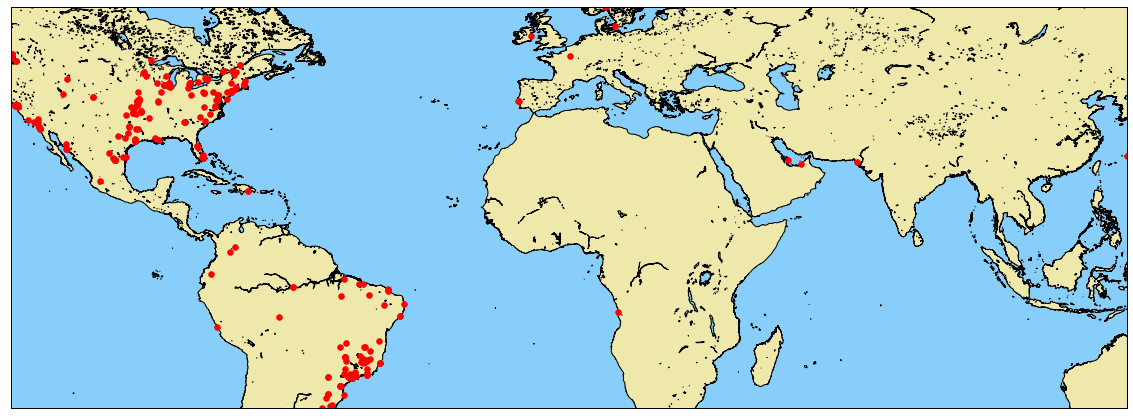

In [192]:
#Criando um mapa com a localização das empresas
plt.figure(figsize=(20,15))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color = 'lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(conexoes['Longitude'], conexoes['Latitude'], s = 30, c = 'red', zorder = 2);

In [193]:
#Buscando uma localização de teste pelas coordenadas geograficas
localizacao = rg.search((conexoes['Latitude'][4], conexoes['Longitude'][4]))

Loading formatted geocoded file...


In [194]:
#Veificando localização
localizacao

[{'lat': '-19.92083',
  'lon': '-43.93778',
  'name': 'Belo Horizonte',
  'admin1': 'Minas Gerais',
  'admin2': 'Belo Horizonte',
  'cc': 'BR'}]

In [195]:
#Selecioanando País e Cidade
localizacao[0]['cc'], localizacao[0]['name']

('BR', 'Belo Horizonte')

In [196]:
#Criando duas novas colunas
conexoes['Cidade'] = None
conexoes['País'] = None

In [197]:
#Buscando todos os cidades e países das empresas
for i in range(0,  len(conexoes)):
    try:
        localizacao = rg.search((conexoes['Latitude'][i], conexoes['Longitude'][i]))
        conexoes['País'][i] = localizacao[0]['cc']
        conexoes['Cidade'][i] = localizacao[0]['name']
    except:
        print(conexoes['Company'][i])

<ipython-input-197-eace88d16d29>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-197-eace88d16d29>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Griloano
J.A. Sistemas de Energia
Víktor Waewell
B2W Digital
JBA | Jabour Brandão Alkmim Advocacia e Consultoria
H7 PROJETOS MECÂNICOS
Grupo Carmo Alves Empreendimentos Imobiliários LTDA
JJL Projetos e Consultoria Ltda
BM&FBOVESPA agora é B3
Delly's Food Service
Eleições 2020
3 Corações S/A
Mimus Sobre Rodas
AeM Negócios Públicos
3DFindable
SegundoSOL Engenharia LTDA
Vox2you Rede de Escolas de Oratória
W1 Consultoria Financeira
La Cita Eventos e Produções
Em Busca de Novas Oportunidades
Elvenworks
Dg Socialm


In [198]:
#Salvando em um CSV
conexoes.to_csv('conexoes_loc_complet.csv', index=False)

In [199]:
#Lendo o CSV
conexoes = pd.read_csv('conexoes_loc_complet.csv')
conexoes.head()

Company                              Position  \
0                 Sonastério               Coordenador de projetos   
1                 BN Express                                   CEO   
2       Toro - Investimentos             Senior Talent Acquisition   
3                      FIEMG  Coordenadora de Educação Corporativa   
4  Instituto Defesa Coletiva               Analista Administrativo   

  Connected On        Full Name   ano      mes  mes_n   Latitude  Longitude  \
0   2019-01-20   Stephanie Ball  2019  Janeiro      1 -20.101491 -43.928009   
1   2019-01-19      Shirley Cox  2019  Janeiro      1  40.639857 -73.977932   
2   2019-01-18  Catherine White  2019  Janeiro      1 -19.935331 -43.929717   
3   2019-01-18    Charles Grant  2019  Janeiro      1 -19.933232 -43.924736   
4   2019-01-17    Michael Ellis  2019  Janeiro      1 -19.930053 -43.932593   

           Cidade País  
0       Nova Lima   BR  
1        Brooklyn   US  
2  Belo Horizonte   BR  
3  Belo Horizonte   BR  
4  Belo Horizonte   BR

In [200]:
#Verificando a Quantidade de contatos por país
grafico = px.histogram(x = conexoes['País'], 
                       title = 'Quantidade de Contatos por País',
                       labels={'x': 'País',})

grafico.show()

In [201]:
#Treemapping por país, cidade e cargo 

grafico = px.treemap(conexoes[conexoes['País'].notnull()], path=['País','Cidade', 'Position', 'Full Name'] )
grafico.show()

In [202]:
#Quantidade por cidade
grafico = px.histogram(x = conexoes['Cidade'], 
                       title = 'Quantidade de Contatos por Cidade',
                       labels={'x': 'Cidade',})
                      
grafico.show()

In [203]:
#Treemapping por cidade

grafico = px.treemap(conexoes[conexoes['Cidade'].notnull()], path =['Cidade', 'Position', 'Full Name'])
grafico.show()

In [204]:
#Selecionando somente empresas no Brasil

conbr = conexoes[conexoes['País'] == 'BR']

conbr.head()

Company                              Position  \
0                 Sonastério               Coordenador de projetos   
2       Toro - Investimentos             Senior Talent Acquisition   
3                      FIEMG  Coordenadora de Educação Corporativa   
4  Instituto Defesa Coletiva               Analista Administrativo   
5         www.RogerLessa.com                                   CEO   

  Connected On        Full Name   ano      mes  mes_n   Latitude  Longitude  \
0   2019-01-20   Stephanie Ball  2019  Janeiro      1 -20.101491 -43.928009   
2   2019-01-18  Catherine White  2019  Janeiro      1 -19.935331 -43.929717   
3   2019-01-18    Charles Grant  2019  Janeiro      1 -19.933232 -43.924736   
4   2019-01-17    Michael Ellis  2019  Janeiro      1 -19.930053 -43.932593   
5   2019-01-17    Robert Gibson  2019  Janeiro      1 -18.956625 -48.271575   

           Cidade País  
0       Nova Lima   BR  
2  Belo Horizonte   BR  
3  Belo Horizonte   BR  
4  Belo Horizonte   BR  
5      Uberlandia   BR

In [205]:
#Tamanho
conbr.shape

(279, 11)

In [206]:
#Treemapping somente BR
grafico = px.treemap(conbr, path=['Cidade', 'Position', 'Full Name'])

grafico.show()

## Aprendizagem Não Supervisionada - Clustering

In [207]:
#Selecionando as latitudes e longitudes
x = conexoes.iloc[:, 7:9].dropna().values

x

array([[-20.101491 , -43.928009 ],
       [ 40.6398574, -73.9779319],
       [-19.9353313, -43.9297169],
       ...,
       [ 40.8947334, -73.9425538],
       [-23.5868282, -46.6455084],
       [ 42.2368706, -88.8706891]])

In [208]:
#Aplicando o algoritimo KMeans com 15 clusters
kmeans = KMeans(n_clusters=15)
kmeans.fit(x)

KMeans(n_clusters=15)

In [209]:
#Verificando os clusters
kmeans.labels_

array([ 1,  3,  1,  1,  1,  1,  1,  1,  1, 13, 12,  3,  1, 13,  1,  0,  1,
        1,  1,  5,  0,  1,  1, 13,  1, 11,  1,  4,  1,  1,  5, 11,  1,  1,
        9,  2,  1,  1, 11,  1,  0,  9,  1, 13, 13, 10,  1,  1,  5,  3, 13,
        1, 11, 12,  5, 12,  1, 10,  1,  1,  1,  1,  1,  3, 13,  1,  3, 14,
        0,  1,  3,  1, 10,  1,  1,  0,  3,  0,  1,  0,  1,  0,  0,  1,  3,
        6, 11,  1,  5,  9,  3,  1,  1,  1,  5,  1,  9,  1,  3,  1,  1,  1,
       12,  0,  1,  1, 13, 10,  3,  1, 11,  3,  3,  0, 11,  1, 12,  4,  1,
        3,  1,  9, 14,  9,  1, 11, 13, 12,  0,  3,  1,  1,  1,  5,  1, 11,
        1,  1,  1, 12,  9,  3,  9,  1,  1,  3,  1, 11,  1,  5,  1,  1, 11,
        3,  9,  1, 11,  3,  5,  0, 10,  1,  1, 13,  1,  0,  0,  1,  1,  2,
       12,  1,  1,  1,  1,  1,  1, 11,  9,  3,  1, 14, 12,  1,  6,  1,  9,
        1,  1,  3,  5,  9,  1,  1,  6,  1, 11,  1,  1,  3,  1,  6,  1,  1,
       14,  3,  1,  5, 13,  3,  0, 11,  1,  1,  3,  1,  1,  3,  1,  5,  2,
        3,  1,  1, 11,  1

In [210]:
#Verificando os centroides
kmeans.cluster_centers_

array([[  36.84747884,  -95.38779675],
       [ -19.89551474,  -44.0441327 ],
       [  49.2231126 ,    0.16807913],
       [  41.71507906,  -76.16947994],
       [  24.8641931 ,   57.70152547],
       [  34.5373731 , -117.34913203],
       [  -2.59200234,  -69.37203591],
       [  26.3016827 ,  127.8049672 ],
       [  -8.8810489 ,   13.2670265 ],
       [  27.36647692,  -98.45316085],
       [  -5.07347952,  -40.71951261],
       [ -24.57720053,  -48.15459444],
       [  28.04018458,  -80.1955795 ],
       [  42.34484439,  -87.74164871],
       [  48.42322244, -122.89349572]])

In [211]:
#Criando arquivos KML para Google Earth
kml_contatos = simplekml.Kml()

In [212]:
#Criando arquivos de conexoes em KML para Google Earth
for i in range(0, len(conexoes)):
    kml_contatos.newpoint(name=conexoes['Full Name'][i],
                         coords=[(conexoes['Longitude'][i],
                                 conexoes['Latitude'][i])])
kml_contatos.save('conexoes.kml')

In [213]:
#Criando arquivos dos grupos em KML para Google Earth

kml_grupos = simplekml.Kml()
for i in range(len(kmeans.cluster_centers_)):
    kml_grupos.newpoint(name = 'Grupo {}'.format(i),
                      coords = [(kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][0])])
kml_grupos.save('grupos.kml')

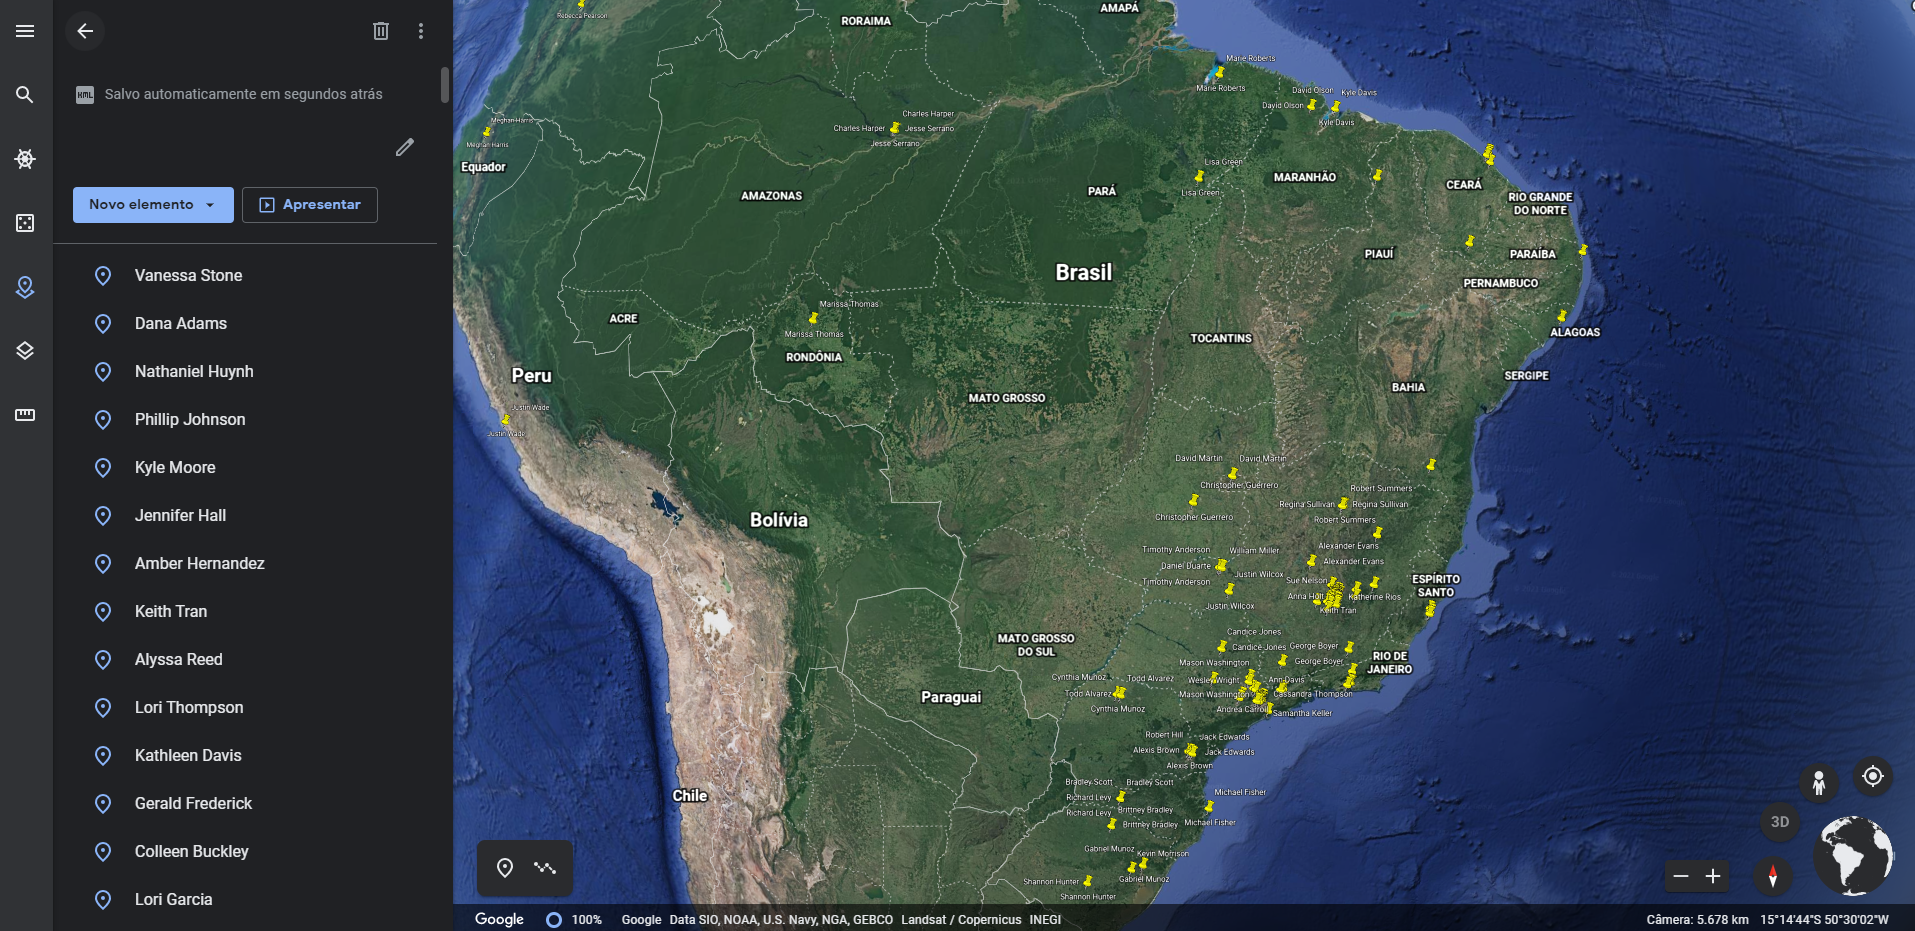

In [214]:
#Após upload dos KML no site do google earth

from IPython.display import Image
Image(filename='googleearth.png')